In [1]:
import pandas as pd

In [2]:
names = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
           'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system',
           'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data', names=names, thousands=r',')

In [4]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470




---



In [5]:
df = df.replace(['?'], pd.NA)

In [6]:
df = df.dropna(axis=0)

In [7]:
df = df.drop('symboling', axis=1)

In [8]:
for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes

In [9]:
from sklearn.preprocessing import StandardScaler
scaled_df = StandardScaler().fit_transform(df)

In [10]:
scaled_df

array([[ 0.15300795, -2.03264726,  0.32274861, ..., -0.41494538,
        -0.3233128 , -1.25014992],
       [ 0.15300795, -2.03264726,  0.32274861, ..., -1.40212216,
        -1.56577168, -0.86539534],
       [ 0.02256149, -2.03264726,  0.32274861, ..., -1.23759269,
        -1.0998496 , -0.81730102],
       ...,
       [ 1.587919  ,  1.38417211,  0.32274861, ..., -1.40212216,
        -1.41046432, -0.52873508],
       [ 1.587919  ,  1.38417211, -3.09838668, ..., -0.08588645,
        -0.78923488, -0.48064075],
       [ 1.587919  ,  1.38417211,  0.32274861, ..., -1.23759269,
        -1.0998496 , -0.45659359]])



---



In [27]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5)

In [28]:
model.fit(scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [30]:
model.labels_

array([2, 2, 2, 2, 2, 2, 4, 2, 1, 1, 1, 1, 1, 4, 1, 1, 1, 0, 4, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2,
       3, 3, 3, 3, 4, 1, 1, 1, 4, 4, 0, 0, 0, 4, 4, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 2, 2, 2, 4, 4, 4, 2, 3, 2, 3, 2, 3, 2, 1, 4, 1, 1,
       1, 0, 4, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4,
       0, 3, 0, 0, 0, 4, 4, 2, 3, 0, 3, 0, 0, 3, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 2], dtype=int32)

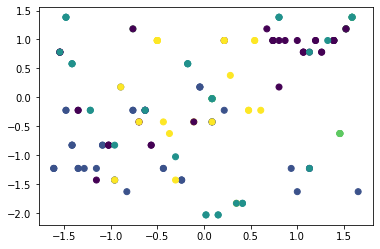

In [29]:
import matplotlib.pyplot as plt
plt.scatter(scaled_df[:,0] , scaled_df[:,1], c=model.labels_)
plt.show()